<a href="https://colab.research.google.com/github/zhanyao17/ODL/blob/main/CNN_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0, 5.0)

In [4]:
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
y = data['PRICE']
x = data.drop('PRICE', axis=1)

In [8]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D

model = Sequential()
model.add(Conv1D(32,(3),input_shape=(13,1),activation='relu'))
model.add(Conv1D(64,(3),activation='relu'))
model.add(Conv1D(128,(3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

model.compile(loss='mse',optimizer='adam',metrics=['mae'])
# model.summary()

In [10]:
history = model.fit(x_train, y_train,batch_size=28,epochs=30,validation_data=(x_test, y_test))

Epoch 1/30
13/13 [==============================] - 2s 30ms/step - loss: 130.1313 - mae: 8.6013 - val_loss: 111.8742 - val_mae: 7.4970
Epoch 2/30
13/13 [==============================] - 0s 9ms/step - loss: 86.7617 - mae: 7.0842 - val_loss: 66.6401 - val_mae: 5.5848
Epoch 3/30
13/13 [==============================] - 0s 8ms/step - loss: 61.3954 - mae: 5.5720 - val_loss: 65.8426 - val_mae: 5.6479
Epoch 4/30
13/13 [==============================] - 0s 10ms/step - loss: 58.9670 - mae: 5.3040 - val_loss: 65.8735 - val_mae: 5.6223
Epoch 5/30
13/13 [==============================] - 0s 9ms/step - loss: 62.7144 - mae: 5.6939 - val_loss: 67.9802 - val_mae: 6.0280
Epoch 6/30
13/13 [==============================] - 0s 8ms/step - loss: 63.1942 - mae: 5.6541 - val_loss: 64.8926 - val_mae: 5.4500
Epoch 7/30
13/13 [==============================] - 0s 8ms/step - loss: 61.8164 - mae: 5.7183 - val_loss: 66.9077 - val_mae: 5.3972
Epoch 8/30
13/13 [==============================] - 0s 8ms/step - loss: 

# Evaluation

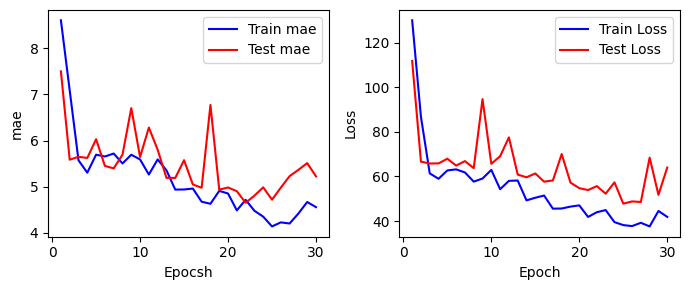

In [13]:
import matplotlib.pyplot as plt

acc2 = history.history['mae']
val_acc = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2,'b',label='Train mae')
axes[0].plot(epochs, val_acc,'r',label='Test mae')
axes[0].set_xlabel('Epocsh')
axes[0].set_ylabel('mae')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

# Deep neural network (DNN)

In [14]:
model = Sequential()
model.add(Dense(32,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

In [15]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),batch_size=28)

Epoch 1/30
13/13 [==============================] - 1s 20ms/step - loss: 1379.6012 - mae: 28.2401 - val_loss: 120.3935 - val_mae: 8.2311
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 227.5022 - mae: 12.1651 - val_loss: 156.0205 - val_mae: 11.0481
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 106.5308 - mae: 8.0308 - val_loss: 88.0372 - val_mae: 6.2333
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 75.5302 - mae: 6.4169 - val_loss: 66.0982 - val_mae: 5.8198
Epoch 5/30
13/13 [==============================] - 0s 6ms/step - loss: 65.6382 - mae: 5.8812 - val_loss: 71.2060 - val_mae: 6.4432
Epoch 6/30
13/13 [==============================] - 0s 6ms/step - loss: 64.4972 - mae: 5.9597 - val_loss: 65.1920 - val_mae: 5.8815
Epoch 7/30
13/13 [==============================] - 0s 6ms/step - loss: 61.4607 - mae: 5.7907 - val_loss: 63.9540 - val_mae: 5.6953
Epoch 8/30
13/13 [==============================] - 0s 6ms/step - 

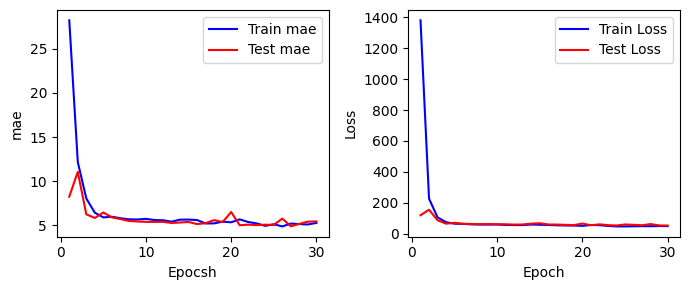

In [16]:
import matplotlib.pyplot as plt

acc2 = history.history['mae']
val_acc = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc2,'b',label='Train mae')
axes[0].plot(epochs, val_acc,'r',label='Test mae')
axes[0].set_xlabel('Epocsh')
axes[0].set_ylabel('mae')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()